ANÁLISIS COMPLETO DE DATOS: DATASET DE CALIDAD DEL VINO

PASO 1: DESCARGA Y CARGA DE DATOS
--------------------------------------------------------------------------------
Dataset cargado exitosamente desde: https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv
Dimensiones del dataset: 1599 filas y 12 columnas

Primeras 5 filas del dataset:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1  

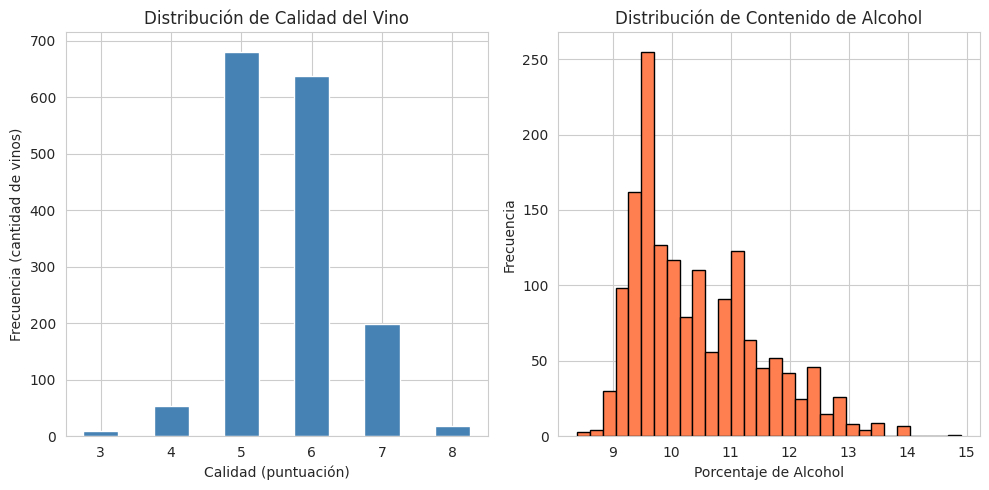

Matriz de correlación (primeras 6 columnas):
                     fixed acidity  volatile acidity  citric acid  \
fixed acidity                 1.00             -0.26         0.67   
volatile acidity             -0.26              1.00        -0.55   
citric acid                   0.67             -0.55         1.00   
residual sugar                0.11              0.00         0.14   
chlorides                     0.09              0.06         0.20   
free sulfur dioxide          -0.15             -0.01        -0.06   

                     residual sugar  chlorides  free sulfur dioxide  
fixed acidity                  0.11       0.09                -0.15  
volatile acidity               0.00       0.06                -0.01  
citric acid                    0.14       0.20                -0.06  
residual sugar                 1.00       0.06                 0.19  
chlorides                      0.06       1.00                 0.01  
free sulfur dioxide            0.19       0.01     

In [ ]:
# ============================================================================
# BLOQUE 1: CARGA, EXPLORACIÓN INICIAL, LIMPIEZA E IMPUTACIÓN DE DATOS
# ============================================================================

# --- PASO 1: IMPORTAR LIBRERÍAS NECESARIAS ---
# Estas son las herramientas que necesitamos para trabajar con datos

import pandas as pd  # Para manipular datos en formato tabular (DataFrames)
import numpy as np  # Para operaciones matemáticas y manejo de arrays
import matplotlib.pyplot as plt  # Para crear gráficos y visualizaciones
import seaborn as sns  # Para visualizaciones estadísticas más avanzadas
from sklearn.impute import SimpleImputer, KNNImputer  # Para imputar datos faltantes
import warnings  # Para manejar advertencias del sistema
warnings.filterwarnings('ignore')  # Ignorar advertencias para tener salida más limpia

# Configuración de visualización para que los gráficos se vean mejor
sns.set_style("whitegrid")  # Estilo de fondo con cuadrícula blanca
plt.rcParams['figure.figsize'] = (10, 6)  # Tamaño por defecto de los gráficos

print("=" * 80)
print("ANÁLISIS COMPLETO DE DATOS: DATASET DE CALIDAD DEL VINO")
print("=" * 80)
print()

# --- PASO 2: DESCARGA Y CARGA DEL DATASET ---
print("PASO 1: DESCARGA Y CARGA DE DATOS")
print("-" * 80)

# ENLACE REAL del dataset:
# https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv

# Descargamos el dataset directamente desde el repositorio UCI
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"

# Cargamos los datos usando pandas
# sep=";" indica que los datos están separados por punto y coma
# Si estuvieran separados por coma usaríamos sep=","
# Si estuvieran separados por barra usaríamos sep="/"
df_original = pd.read_csv(url, sep=";")

print(f"Dataset cargado exitosamente desde: {url}")
print(f"Dimensiones del dataset: {df_original.shape[0]} filas y {df_original.shape[1]} columnas")
print()

# Crear una copia para trabajar sin modificar el original
df = df_original.copy()

print("Primeras 5 filas del dataset:")
print(df.head())
print()

print("Información general del dataset:")
print(df.info())
print()

# --- PASO 3: EXPLORACIÓN INICIAL DE DATOS (EDA) ---
print("\n" + "=" * 80)
print("PASO 2: EXPLORACIÓN INICIAL DE DATOS (EDA)")
print("-" * 80)

# Estadísticas descriptivas de todas las columnas numéricas
print("Estadísticas descriptivas:")
print(df.describe())
print()

# Verificar tipos de datos de cada columna
print("Tipos de datos por columna:")
print(df.dtypes)
print()

# Visualización 1: Distribución de la variable objetivo (calidad del vino)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
# value_counts() cuenta cuántas veces aparece cada valor de calidad
df['quality'].value_counts().sort_index().plot(kind='bar', color='steelblue')
plt.title('Distribución de Calidad del Vino')
plt.xlabel('Calidad (puntuación)')
plt.ylabel('Frecuencia (cantidad de vinos)')
plt.xticks(rotation=0)

# Visualización 2: Distribución de alcohol
plt.subplot(1, 2, 2)
# hist() crea un histograma mostrando la distribución de los valores
plt.hist(df['alcohol'], bins=30, color='coral', edgecolor='black')
plt.title('Distribución de Contenido de Alcohol')
plt.xlabel('Porcentaje de Alcohol')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

# Matriz de correlación inicial
print("Matriz de correlación (primeras 6 columnas):")
# corr() calcula la correlación entre todas las variables numéricas
# Los valores van de -1 (correlación negativa perfecta) a 1 (correlación positiva perfecta)
print(df.iloc[:, :6].corr().round(2))
print()

# --- PASO 4: LIMPIEZA DE DATOS (10 OPERACIONES DISTINTAS) ---
print("\n" + "=" * 80)
print("PASO 3: LIMPIEZA DE DATOS - 10 OPERACIONES")
print("-" * 80)

# OPERACIÓN 1: Identificar valores nulos
print("\nOPERACIÓN 1: Identificar valores nulos")
print("-" * 40)
# isnull().sum() cuenta cuántos valores nulos hay en cada columna
valores_nulos = df.isnull().sum()
print("Valores nulos por columna:")
print(valores_nulos)
print(f"Total de valores nulos en el dataset: {valores_nulos.sum()}")
print()

# OPERACIÓN 2: Renombrar columnas para estandarizar nombres
print("OPERACIÓN 2: Estandarizar nombres de columnas")
print("-" * 40)
print("Nombres originales de columnas:")
print(list(df.columns))
# Renombramos las columnas eliminando espacios y usando guión bajo
# También convertimos todo a minúsculas para consistencia
df.columns = df.columns.str.replace(' ', '_').str.lower()
print("\nNombres estandarizados:")
print(list(df.columns))
print()

# OPERACIÓN 3: Crear una columna de fecha simulada y unificar formatos
print("OPERACIÓN 3: Unificar formatos de fechas")
print("-" * 40)
# Creamos fechas de ejemplo en diferentes formatos para demostrar la unificación
np.random.seed(42)  # Semilla para reproducibilidad
fechas_variadas = [
    '2023-01-15',  # Formato ISO
    '15/01/2023',  # Formato DD/MM/YYYY
    '01-15-2023',  # Formato MM-DD-YYYY
    '2023/01/15'   # Formato ISO con barras
]
# Repetimos estas fechas para tener suficientes para todo el dataset
df['fecha_produccion'] = np.random.choice(fechas_variadas, size=len(df))
print("Primeras fechas antes de unificar:")
print(df['fecha_produccion'].head(10))

# Convertimos todas las fechas a un formato estándar usando pd.to_datetime()
# errors='coerce' convierte fechas inválidas a NaT (Not a Time)
df['fecha_produccion'] = pd.to_datetime(df['fecha_produccion'],
                                        format='mixed',  # Acepta múltiples formatos
                                        dayfirst=False)  # El mes va primero en formatos ambiguos
print("\nPrimeras fechas después de unificar (formato estándar):")
print(df['fecha_produccion'].head(10))
print()

# OPERACIÓN 4: Detectar y corregir valores fuera de rango
print("OPERACIÓN 4: Detectar valores fuera de rango")
print("-" * 40)
# El pH del vino debe estar típicamente entre 2.5 y 4.5
print(f"Rango de pH original: {df['ph'].min():.2f} a {df['ph'].max():.2f}")
# Identificamos valores atípicos (outliers) usando el rango intercuartílico (IQR)
Q1 = df['ph'].quantile(0.25)  # Primer cuartil (25%)
Q3 = df['ph'].quantile(0.75)  # Tercer cuartil (75%)
IQR = Q3 - Q1  # Rango intercuartílico
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR
outliers_ph = df[(df['ph'] < limite_inferior) | (df['ph'] > limite_superior)]
print(f"Valores atípicos detectados: {len(outliers_ph)} registros")
print(f"Límites aceptables: {limite_inferior:.2f} a {limite_superior:.2f}")
print()

# OPERACIÓN 5: Unificar números flotantes (punto vs coma decimal)
print("OPERACIÓN 5: Unificar separadores decimales")
print("-" * 40)
# Simulamos que algunos valores tienen coma como separador decimal
# Convertimos la columna a string para manipularla
df_temp = df['alcohol'].head(5).astype(str)
print("Valores originales con punto decimal:")
print(df_temp.values)
# Reemplazamos punto por coma para simular el problema
df_temp_coma = df_temp.str.replace('.', ',')
print("\nValores simulados con coma decimal:")
print(df_temp_coma.values)
# Los convertimos de vuelta reemplazando coma por punto
df_temp_corregido = df_temp_coma.str.replace(',', '.').astype(float)
print("\nValores corregidos a punto decimal:")
print(df_temp_corregido.values)
print()

# OPERACIÓN 6: Eliminar duplicados exactos
print("OPERACIÓN 6: Eliminar filas duplicadas")
print("-" * 40)
filas_antes = len(df)
# duplicated() identifica filas que son exactamente iguales a otras
duplicados = df.duplicated().sum()
print(f"Filas duplicadas encontradas: {duplicados}")
# drop_duplicates() elimina las filas duplicadas, manteniendo la primera ocurrencia
df = df.drop_duplicates()
filas_despues = len(df)
print(f"Filas eliminadas: {filas_antes - filas_despues}")
print(f"Filas restantes: {filas_despues}")
print()

# OPERACIÓN 7: Redondear valores a decimales consistentes
print("OPERACIÓN 7: Estandarizar decimales")
print("-" * 40)
print("Valores de densidad antes de redondear:")
print(df['density'].head())
# round() redondea los valores al número de decimales especificado
df['density'] = df['density'].round(4)  # Redondeamos a 4 decimales
print("\nValores de densidad después de redondear (4 decimales):")
print(df['density'].head())
print()

# OPERACIÓN 8: Crear categorías a partir de valores continuos
print("OPERACIÓN 8: Categorizar variables continuas")
print("-" * 40)
# Creamos categorías de calidad basadas en los valores numéricos
# cut() divide los datos en intervalos y asigna etiquetas
df['categoria_calidad'] = pd.cut(df['quality'],
                                 bins=[0, 5, 6, 10],  # Intervalos: 0-5, 5-6, 6-10
                                 labels=['Baja', 'Media', 'Alta'])  # Etiquetas
print("Distribución de categorías de calidad:")
print(df['categoria_calidad'].value_counts())
print()

# OPERACIÓN 9: Normalizar texto en columnas categóricas
print("OPERACIÓN 9: Normalizar texto")
print("-" * 40)
# Creamos una columna con texto en diferentes formatos para demostrar normalización
df['tipo_vino'] = 'tinto'  # Todos son vinos tintos en este dataset
# Simulamos diferentes formatos
df.loc[:5, 'tipo_vino'] = 'TINTO'  # Mayúsculas
df.loc[6:10, 'tipo_vino'] = ' tinto '  # Con espacios
df.loc[11:15, 'tipo_vino'] = 'Tinto'  # Capitalizado
print("Valores antes de normalizar:")
print(df['tipo_vino'].head(20).unique())
# Normalizamos: eliminamos espacios y convertimos a minúsculas
df['tipo_vino'] = df['tipo_vino'].str.strip().str.lower()
print("\nValores después de normalizar:")
print(df['tipo_vino'].unique())
print()

# OPERACIÓN 10: Detectar y manejar valores extremos usando z-score
print("OPERACIÓN 10: Detectar valores extremos con z-score")
print("-" * 40)
# El z-score indica cuántas desviaciones estándar está un valor de la media
# Valores con z-score > 3 o < -3 se consideran extremos
from scipy import stats
z_scores = np.abs(stats.zscore(df['volatile_acidity']))
# Un z-score > 3 indica un valor muy alejado de la media (outlier)
outliers_zscore = df[z_scores > 3]
print(f"Valores extremos detectados (z-score > 3): {len(outliers_zscore)}")
print(f"Porcentaje del dataset: {len(outliers_zscore)/len(df)*100:.2f}%")
print("Primeros valores extremos:")
print(df.loc[z_scores > 3, 'volatile_acidity'].head())
print()

# --- PASO 5: GENERACIÓN E IMPUTACIÓN DE DATOS FALTANTES ---
print("\n" + "=" * 80)
print("PASO 4: GENERACIÓN E IMPUTACIÓN DE DATOS FALTANTES")
print("-" * 80)

# Crear una copia para introducir valores faltantes artificiales
df_con_faltantes = df.copy()

# Generamos valores faltantes de forma aleatoria en varias columnas
np.random.seed(42)  # Para reproducibilidad
columnas_faltantes = ['fixed_acidity', 'ph', 'alcohol', 'sulphates']
porcentaje_faltante = 0.15  # 15% de datos faltantes

print(f"Generando {porcentaje_faltante*100}% de datos faltantes en columnas seleccionadas...")
for columna in columnas_faltantes:
    # Seleccionamos índices aleatorios
    indices_faltantes = np.random.choice(df_con_faltantes.index,
                                        size=int(len(df_con_faltantes) * porcentaje_faltante),
                                        replace=False)
    # Asignamos NaN (Not a Number) a esos índices
    df_con_faltantes.loc[indices_faltantes, columna] = np.nan

print("\nValores faltantes generados:")
print(df_con_faltantes[columnas_faltantes].isnull().sum())
print()

# MÉTODO 1: Imputación con la media
print("MÉTODO 1: Imputación con la MEDIA")
print("-" * 40)
print("Cuándo usar: Cuando los datos tienen distribución aproximadamente normal")
print("y no hay muchos valores atípicos")
df_media = df_con_faltantes.copy()
# SimpleImputer con strategy='mean' reemplaza los NaN con el promedio de la columna
imputer_media = SimpleImputer(strategy='mean')
# fit_transform() calcula la media y reemplaza los valores en un solo paso
df_media[columnas_faltantes] = imputer_media.fit_transform(df_media[columnas_faltantes])
print(f"Ejemplo - Alcohol antes (con NaN): {df_con_faltantes['alcohol'].head(10).values}")
print(f"Ejemplo - Alcohol después (media={df['alcohol'].mean():.2f}): {df_media['alcohol'].head(10).values}")
print()

# MÉTODO 2: Imputación con la mediana
print("MÉTODO 2: Imputación con la MEDIANA")
print("-" * 40)
print("Cuándo usar: Cuando hay valores atípicos que podrían sesgar la media")
print("La mediana es más robusta a outliers")
df_mediana = df_con_faltantes.copy()
# strategy='median' usa el valor del medio cuando ordenamos los datos
imputer_mediana = SimpleImputer(strategy='median')
df_mediana[columnas_faltantes] = imputer_mediana.fit_transform(df_mediana[columnas_faltantes])
print(f"Media de pH: {df['ph'].mean():.3f}")
print(f"Mediana de pH: {df['ph'].median():.3f}")
print(f"Diferencia: {abs(df['ph'].mean() - df['ph'].median()):.3f}")
print()

# MÉTODO 3: Imputación con la moda (valor más frecuente)
print("MÉTODO 3: Imputación con la MODA")
print("-" * 40)
print("Cuándo usar: Principalmente para variables categóricas")
print("o cuando queremos usar el valor más común")
df_moda = df_con_faltantes.copy()
# strategy='most_frequent' usa el valor que más se repite
imputer_moda = SimpleImputer(strategy='most_frequent')
df_moda[columnas_faltantes] = imputer_moda.fit_transform(df_moda[columnas_faltantes])
print(f"Valor más frecuente de quality: {df['quality'].mode()[0]}")
print()

# MÉTODO 4: Imputación con KNN (K-Nearest Neighbors)
print("MÉTODO 4: Imputación con KNN (K-Nearest Neighbors)")
print("-" * 40)
print("Cuándo usar: Cuando queremos usar información de registros similares")
print("Es más sofisticado pero computacionalmente más costoso")
df_knn = df_con_faltantes.copy()
# KNNImputer busca los k vecinos más cercanos y usa su promedio
# n_neighbors=5 significa que usará los 5 registros más similares
imputer_knn = KNNImputer(n_neighbors=5)
df_knn[columnas_faltantes] = imputer_knn.fit_transform(df_knn[columnas_faltantes])
print("Este método considera los valores de otras variables para imputar")
print(f"Ejemplo - pH imputado considerando 5 vecinos más cercanos:")
print(df_knn['ph'].head(10).values)
print()

# Comparación de métodos
print("COMPARACIÓN DE MÉTODOS DE IMPUTACIÓN")
print("-" * 40)
columna_comparar = 'alcohol'
print(f"Estadísticas para la columna '{columna_comparar}':")
print(f"Original (sin faltantes): Media = {df[columna_comparar].mean():.3f}, Std = {df[columna_comparar].std():.3f}")
print(f"Imputación con media:     Media = {df_media[columna_comparar].mean():.3f}, Std = {df_media[columna_comparar].std():.3f}")
print(f"Imputación con mediana:   Media = {df_mediana[columna_comparar].mean():.3f}, Std = {df_mediana[columna_comparar].std():.3f}")
print(f"Imputación con moda:      Media = {df_moda[columna_comparar].mean():.3f}, Std = {df_moda[columna_comparar].std():.3f}")
print(f"Imputación con KNN:       Media = {df_knn[columna_comparar].mean():.3f}, Std = {df_knn[columna_comparar].std():.3f}")
print()

# Usaremos el dataset imputado con media para continuar
df = df_media.copy()

print("=" * 80)
print("BLOQUE 1 COMPLETADO")
print("=" * 80)


PASO 5: CONVERSIÓN DE VARIABLES CATEGÓRICAS A NUMÉRICAS
--------------------------------------------------------------------------------
EXPLICACIÓN: ¿Por qué convertir variables categóricas a numéricas?
Los algoritmos de machine learning trabajan con números, no con texto.
Por eso necesitamos convertir categorías como 'Bajo', 'Medio', 'Alto'
en valores numéricos que la computadora pueda procesar.

MÉTODO 1: LABEL ENCODING
----------------------------------------
Cuándo usar: Para variables ORDINALES (con orden lógico)
Ejemplo: Bajo < Medio < Alto

Valores originales de categoria_calidad:
0      Baja
1      Baja
2      Baja
3     Media
5      Baja
6      Baja
7      Alta
8      Alta
9      Baja
10     Baja
Name: categoria_calidad, dtype: category
Categories (3, object): ['Baja' < 'Media' < 'Alta']

Valores después de Label Encoding:
   categoria_calidad  calidad_label
0               Baja              1
1               Baja              1
2               Baja              1
3         

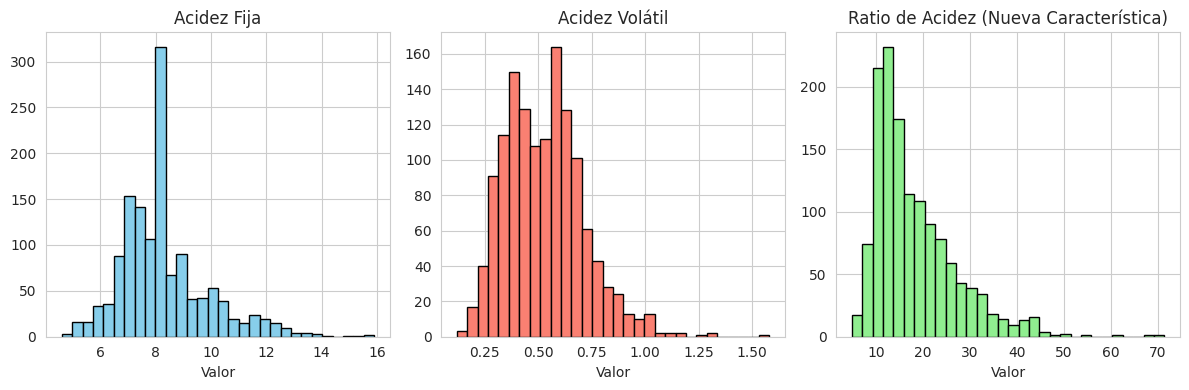

CARACTERÍSTICA 2: Índice de Calidad Compuesto
----------------------------------------
Combinamos múltiples variables químicas en un solo índice
que podría predecir mejor la calidad del vino

Pesos asignados a cada variable:
  alcohol: 40.0%
  ph: 20.0%
  sulphates: 20.0%
  citric_acid: 20.0%

Primeros valores del índice compuesto:
      alcohol       ph  indice_calidad
0    9.400000  3.51000        0.210343
1   10.419392  3.20000        0.238627
2    9.800000  3.26000        0.214367
3    9.800000  3.31019        0.326855
5    9.400000  3.51000        0.178901
6    9.400000  3.31019        0.239731
7   10.000000  3.39000        0.198073
8    9.500000  3.36000        0.331241
9   10.419392  3.35000        0.175420
10   9.200000  3.28000        0.247346

Correlación del índice con la calidad real: 0.096
(Valores cercanos a 1 indican fuerte relación positiva)


PASO 7: ANÁLISIS UNIVARIABLE
--------------------------------------------------------------------------------
EXPLICACIÓN: El an

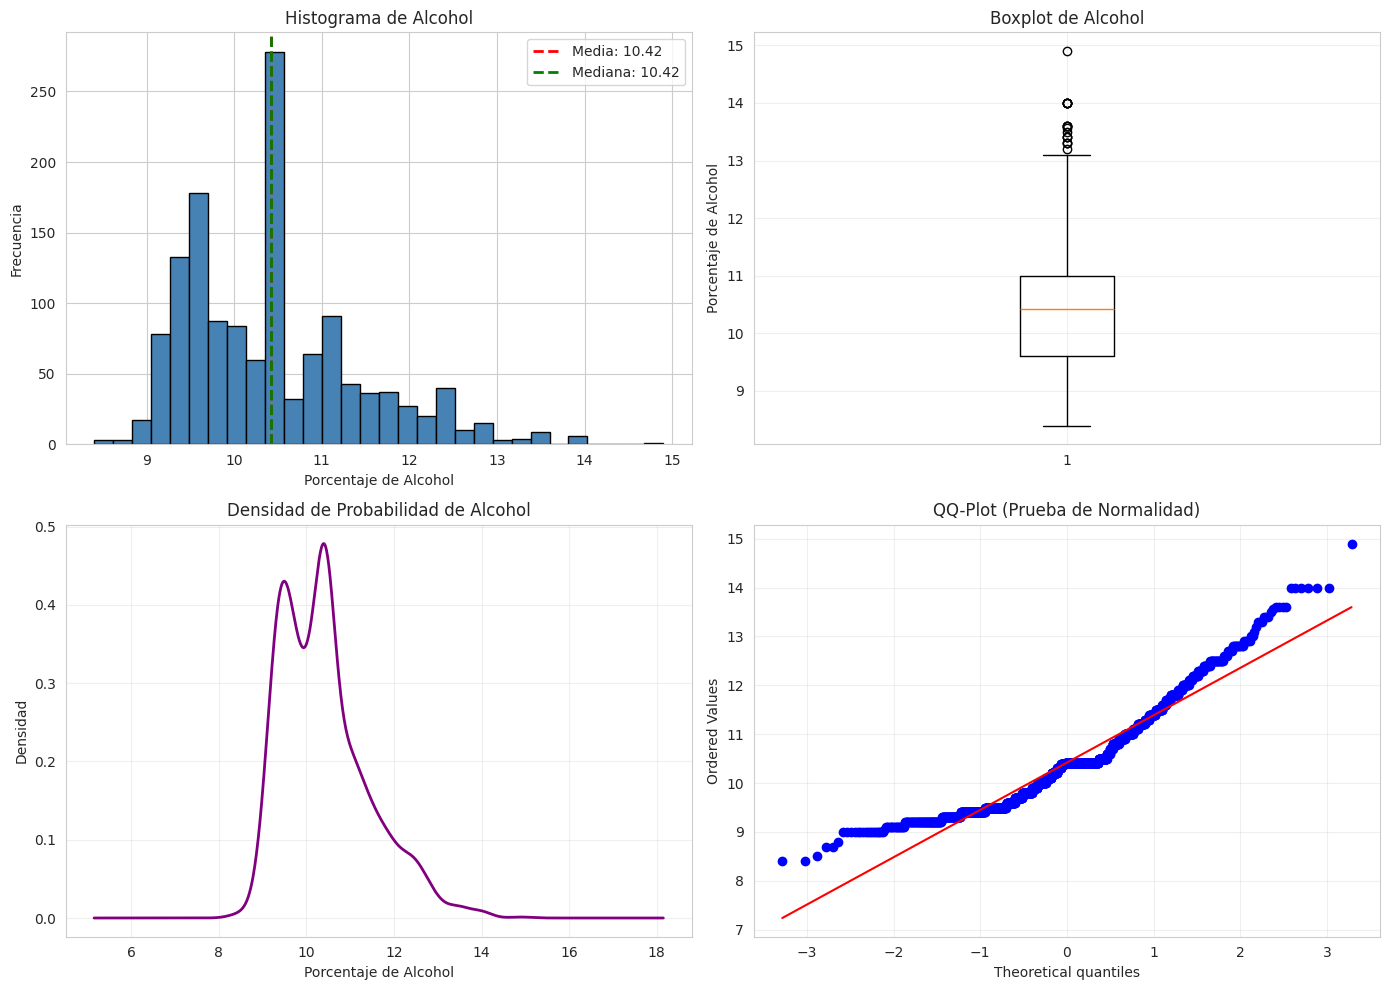

Prueba de normalidad (Shapiro-Wilk):
  Estadístico: 0.9315
  P-valor: 0.0000
  Conclusión: Los datos NO siguen una distribución normal


PASO 8: ANÁLISIS MULTIVARIABLE
--------------------------------------------------------------------------------
EXPLICACIÓN: El análisis multivariable examina relaciones entre
múltiples variables simultáneamente

MATRIZ DE CORRELACIÓN
----------------------------------------
Muestra cómo se relacionan las variables entre sí
Valores cercanos a 1: correlación positiva fuerte
Valores cercanos a -1: correlación negativa fuerte
Valores cercanos a 0: sin correlación

Matriz de correlación:
                  fixed_acidity  volatile_acidity  citric_acid    ph  \
fixed_acidity              1.00             -0.22         0.61 -0.58   
volatile_acidity          -0.22              1.00        -0.55  0.22   
citric_acid                0.61             -0.55         1.00 -0.52   
ph                        -0.58              0.22        -0.52  1.00   
sulphates     

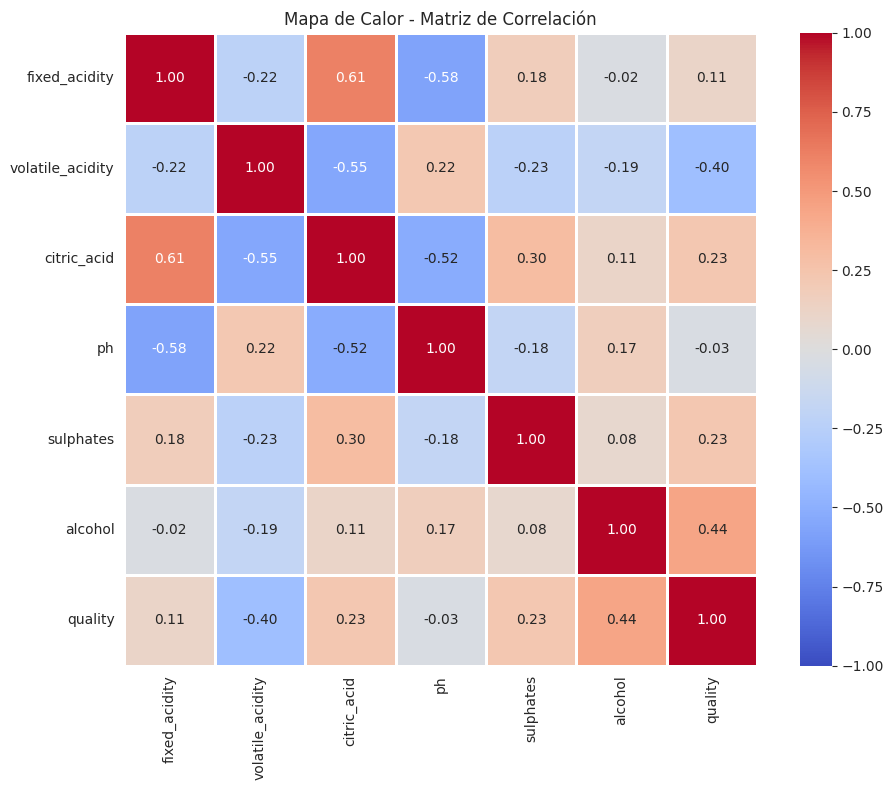

SCATTER PLOT MATRIX
----------------------------------------
Muestra gráficamente las relaciones entre pares de variables



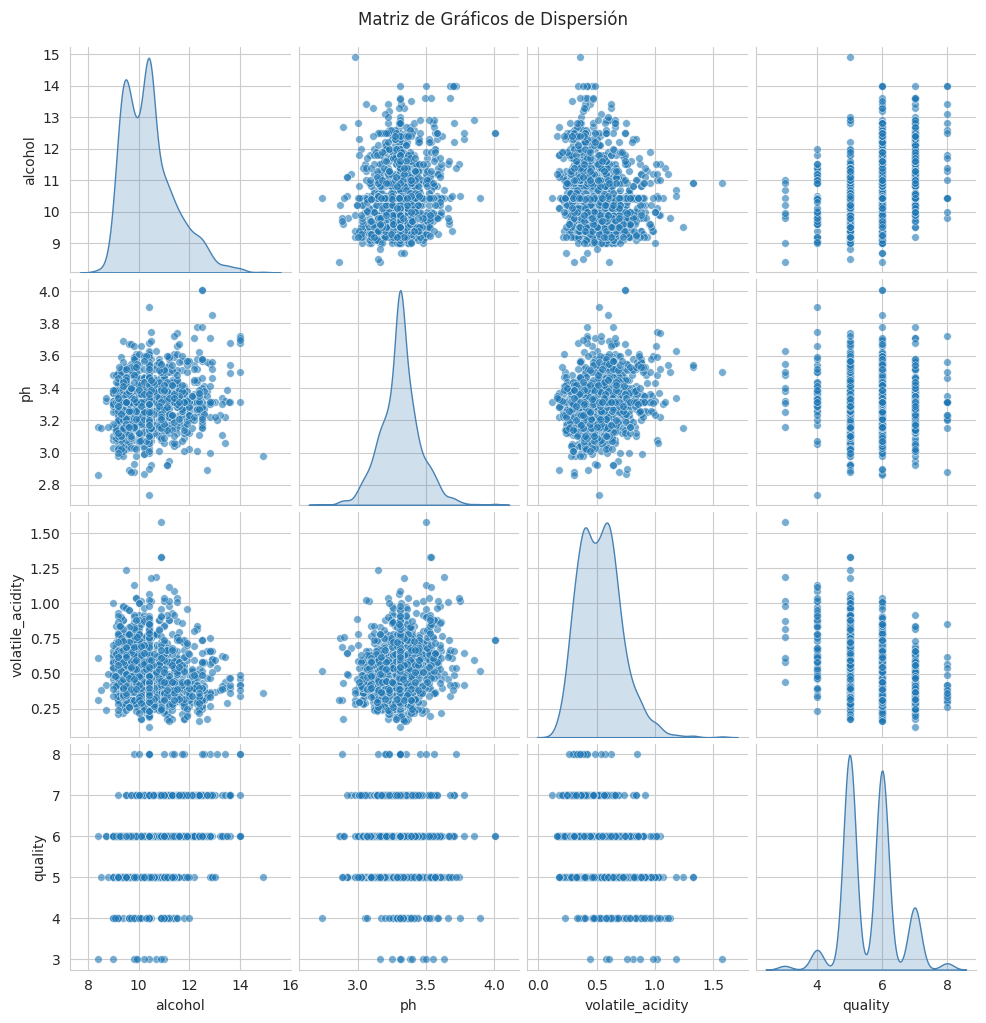

ANÁLISIS POR GRUPOS
----------------------------------------
Comparamos estadísticas entre diferentes niveles de calidad

Promedios de cada variable según la calidad del vino:
         fixed_acidity  volatile_acidity  citric_acid    ph  sulphates  \
quality                                                                  
3                 8.57              0.88         0.17  3.40       0.57   
4                 7.95              0.69         0.17  3.35       0.60   
5                 8.18              0.58         0.24  3.30       0.63   
6                 8.30              0.50         0.28  3.32       0.67   
7                 8.81              0.40         0.37  3.30       0.73   
8                 8.61              0.43         0.38  3.31       0.76   

         alcohol  
quality           
3          10.03  
4          10.32  
5           9.95  
6          10.61  
7          11.35  
8          11.80  



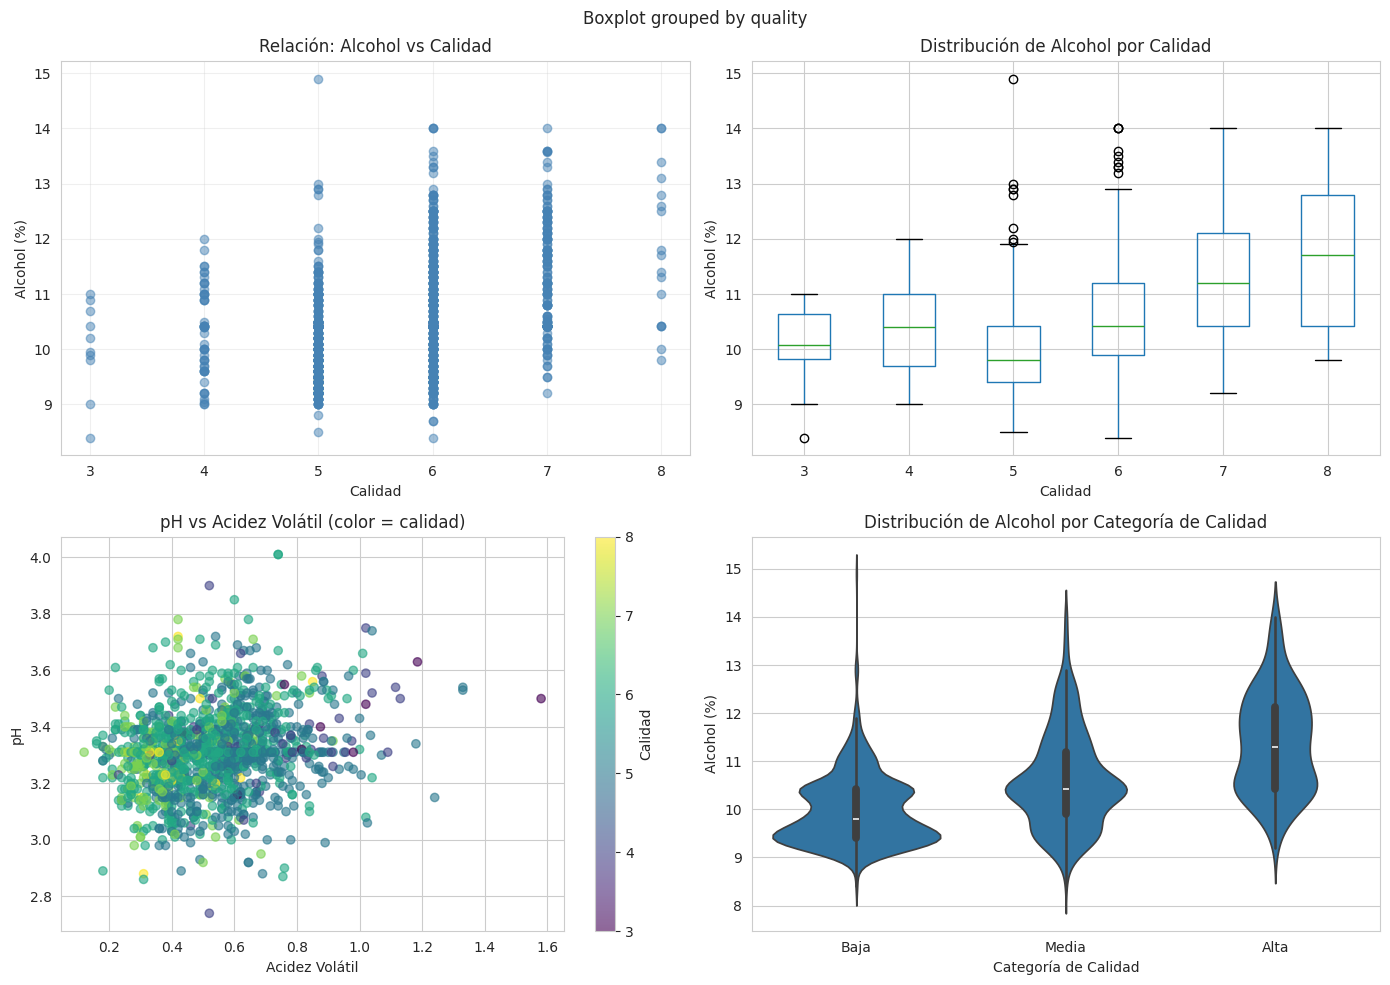

ANÁLISIS DE VARIANZA (ANOVA)
----------------------------------------
Prueba estadística para determinar si hay diferencias significativas
entre grupos

Estadístico F: 84.18
P-valor: 0.000000
Conclusión: HAY diferencias significativas en el contenido de alcohol
entre vinos de diferentes calidades (p < 0.05)

RESUMEN DEL ANÁLISIS COMPLETO
Dataset: 1359 registros, 17 variables
Variables numéricas: 14
Variables categóricas: 2

Procesos completados:
  1. Carga de datos desde fuente real (UCI ML Repository)
  2. Exploración y visualización inicial (EDA)
  3. 10 operaciones de limpieza de datos
  4. 4 métodos de imputación de datos faltantes
  5. 3 técnicas de codificación de variables categóricas
  6. 2 procesos de ingeniería de características
  7. Análisis univariable completo
  8. Análisis multivariable completo

Dataset final preparado para modelado de machine learning


In [ ]:
# ============================================================================
# BLOQUE 2: CODIFICACIÓN, INGENIERÍA DE CARACTERÍSTICAS Y ANÁLISIS
# ============================================================================

print("\n" + "=" * 80)
print("PASO 5: CONVERSIÓN DE VARIABLES CATEGÓRICAS A NUMÉRICAS")
print("-" * 80)

print("EXPLICACIÓN: ¿Por qué convertir variables categóricas a numéricas?")
print("Los algoritmos de machine learning trabajan con números, no con texto.")
print("Por eso necesitamos convertir categorías como 'Bajo', 'Medio', 'Alto'")
print("en valores numéricos que la computadora pueda procesar.")
print()

# Preparamos los datos categóricos para demostrar las tres técnicas
df_encoding = df.copy()

# MÉTODO 1: Label Encoding (Codificación de etiquetas)
print("MÉTODO 1: LABEL ENCODING")
print("-" * 40)
print("Cuándo usar: Para variables ORDINALES (con orden lógico)")
print("Ejemplo: Bajo < Medio < Alto")
print()
from sklearn.preprocessing import LabelEncoder

# Creamos una copia de la columna para mostrar antes y después
print("Valores originales de categoria_calidad:")
print(df_encoding['categoria_calidad'].head(10))

# LabelEncoder asigna un número a cada categoría única
label_encoder = LabelEncoder()
# fit_transform() aprende las categorías y las transforma en un solo paso
df_encoding['calidad_label'] = label_encoder.fit_transform(df_encoding['categoria_calidad'])

print("\nValores después de Label Encoding:")
print(df_encoding[['categoria_calidad', 'calidad_label']].head(10))
print("\nMapeo de categorías a números:")
# classes_ muestra las categorías en el orden en que fueron codificadas
for i, categoria in enumerate(label_encoder.classes_):
    print(f"  {categoria} -> {i}")
print()
print("NOTA: Los números 0, 1, 2 implican un orden. Use este método solo")
print("cuando el orden tenga sentido (Bajo=0, Media=1, Alta=2)")
print()

# MÉTODO 2: One-Hot Encoding (Codificación binaria)
print("MÉTODO 2: ONE-HOT ENCODING")
print("-" * 40)
print("Cuándo usar: Para variables NOMINALES (sin orden lógico)")
print("Ejemplo: Colores (rojo, azul, verde) - ninguno es 'mayor' que otro")
print()

# get_dummies() crea una columna binaria (0 o 1) para cada categoría
# drop_first=False mantiene todas las categorías (para fines didácticos)
df_onehot = pd.get_dummies(df_encoding['tipo_vino'],
                           prefix='tipo',  # Prefijo para nombrar las nuevas columnas
                           drop_first=False)  # Mantener todas las categorías

print("Valores originales de tipo_vino:")
print(df_encoding['tipo_vino'].head(5))
print("\nDespués de One-Hot Encoding:")
print(df_onehot.head(5))
print()
print("EXPLICACIÓN: Cada fila tiene un 1 en la columna de su categoría")
print("y 0 en las demás. Esto evita asumir un orden que no existe.")
print()

# Concatenamos las nuevas columnas al dataframe original
df_encoding = pd.concat([df_encoding, df_onehot], axis=1)

# MÉTODO 3: Ordinal Encoding (Codificación ordinal manual)
print("MÉTODO 3: ORDINAL ENCODING (Manual)")
print("-" * 40)
print("Cuándo usar: Cuando quieres control total sobre el orden")
print("y los valores numéricos asignados a cada categoría")
print()

# Creamos un mapeo personalizado para convertir categorías a números
# Este diccionario define explícitamente qué número corresponde a qué categoría
mapeo_ordinal = {
    'Baja': 1,   # Calidad baja = 1
    'Media': 5,  # Calidad media = 5
    'Alta': 9    # Calidad alta = 9
}

print("Mapeo personalizado:")
for categoria, valor in mapeo_ordinal.items():
    print(f"  {categoria} -> {valor}")

# map() aplica el diccionario para convertir cada valor
df_encoding['calidad_ordinal'] = df_encoding['categoria_calidad'].map(mapeo_ordinal)

print("\nResultado del Ordinal Encoding:")
print(df_encoding[['categoria_calidad', 'calidad_ordinal']].head(10))
print()
print("VENTAJA: Puedes asignar valores que reflejen la magnitud de la diferencia")
print("Por ejemplo: Baja=1, Media=5, Alta=9 (diferencias no uniformes)")
print()

# Comparación de los tres métodos
print("COMPARACIÓN DE LOS TRES MÉTODOS")
print("-" * 40)
print(df_encoding[['categoria_calidad', 'calidad_label', 'calidad_ordinal']].head(10))
print()

# --- PASO 6: INGENIERÍA DE CARACTERÍSTICAS ---
print("\n" + "=" * 80)
print("PASO 6: INGENIERÍA DE CARACTERÍSTICAS")
print("-" * 80)
print("EXPLICACIÓN: La ingeniería de características consiste en crear nuevas")
print("variables a partir de las existentes para mejorar el análisis.")
print()

# CARACTERÍSTICA 1: Ratio de acidez
print("CARACTERÍSTICA 1: Ratio de Acidez Total")
print("-" * 40)
print("Creamos una nueva variable que relaciona acidez fija y volátil")
print("Esta métrica puede ser más informativa que cada acidez por separado")
print()

# Evitamos división por cero sumando un valor muy pequeño
df_engineering = df.copy()
# Creamos el ratio dividiendo acidez fija entre acidez volátil
df_engineering['ratio_acidez'] = (df_engineering['fixed_acidity'] /
                                  (df_engineering['volatile_acidity'] + 0.0001))

print("Fórmula: ratio_acidez = fixed_acidity / volatile_acidity")
print("\nPrimeros valores generados:")
print(df_engineering[['fixed_acidity', 'volatile_acidity', 'ratio_acidez']].head(10))
print()

# Visualización de la nueva característica
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.hist(df_engineering['fixed_acidity'], bins=30, color='skyblue', edgecolor='black')
plt.title('Acidez Fija')
plt.xlabel('Valor')

plt.subplot(1, 3, 2)
plt.hist(df_engineering['volatile_acidity'], bins=30, color='salmon', edgecolor='black')
plt.title('Acidez Volátil')
plt.xlabel('Valor')

plt.subplot(1, 3, 3)
plt.hist(df_engineering['ratio_acidez'], bins=30, color='lightgreen', edgecolor='black')
plt.title('Ratio de Acidez (Nueva Característica)')
plt.xlabel('Valor')

plt.tight_layout()
plt.show()

# CARACTERÍSTICA 2: Índice de calidad compuesto
print("CARACTERÍSTICA 2: Índice de Calidad Compuesto")
print("-" * 40)
print("Combinamos múltiples variables químicas en un solo índice")
print("que podría predecir mejor la calidad del vino")
print()

# Normalizamos las variables a escala 0-1 para poder combinarlas
# (valor - mínimo) / (máximo - mínimo)
from sklearn.preprocessing import MinMaxScaler

# Seleccionamos variables que influyen en la calidad
variables_calidad = ['alcohol', 'ph', 'sulphates', 'citric_acid']

# MinMaxScaler transforma los valores al rango [0, 1]
scaler = MinMaxScaler()
# fit_transform() aprende los min/max y transforma en un paso
df_scaled = pd.DataFrame(
    scaler.fit_transform(df_engineering[variables_calidad]),
    columns=variables_calidad
)

# Creamos un índice ponderado (dando más peso a algunas variables)
# Los pesos suman 1.0
pesos = {
    'alcohol': 0.4,      # 40% de peso - el alcohol es muy importante
    'ph': 0.2,          # 20% de peso
    'sulphates': 0.2,   # 20% de peso
    'citric_acid': 0.2  # 20% de peso
}

print("Pesos asignados a cada variable:")
for var, peso in pesos.items():
    print(f"  {var}: {peso*100}%")

# Calculamos el índice multiplicando cada variable por su peso y sumando
df_engineering['indice_calidad'] = (
    df_scaled['alcohol'] * pesos['alcohol'] +
    df_scaled['ph'] * pesos['ph'] +
    df_scaled['sulphates'] * pesos['sulphates'] +
    df_scaled['citric_acid'] * pesos['citric_acid']
)

print("\nPrimeros valores del índice compuesto:")
print(df_engineering[['alcohol', 'ph', 'indice_calidad']].head(10))
print()

# Verificamos si el índice se correlaciona con la calidad real
correlacion_indice = df_engineering['indice_calidad'].corr(df_engineering['quality'])
print(f"Correlación del índice con la calidad real: {correlacion_indice:.3f}")
print("(Valores cercanos a 1 indican fuerte relación positiva)")
print()

# --- PASO 7: ANÁLISIS UNIVARIABLE ---
print("\n" + "=" * 80)
print("PASO 7: ANÁLISIS UNIVARIABLE")
print("-" * 80)
print("EXPLICACIÓN: El análisis univariable examina cada variable por separado")
print("para entender su distribución, valores centrales y dispersión")
print()

# Análisis de la variable 'alcohol'
variable_analisis = 'alcohol'
print(f"ANÁLISIS UNIVARIABLE: {variable_analisis.upper()}")
print("-" * 40)

# Medidas de tendencia central
media = df_engineering[variable_analisis].mean()  # Promedio
mediana = df_engineering[variable_analisis].median()  # Valor del medio
moda = df_engineering[variable_analisis].mode()[0]  # Valor más frecuente

print("Medidas de tendencia central:")
print(f"  Media (promedio): {media:.2f}%")
print(f"  Mediana (valor central): {mediana:.2f}%")
print(f"  Moda (valor más frecuente): {moda:.2f}%")
print()

# Medidas de dispersión
desviacion = df_engineering[variable_analisis].std()  # Desviación estándar
varianza = df_engineering[variable_analisis].var()  # Varianza
rango = df_engineering[variable_analisis].max() - df_engineering[variable_analisis].min()

print("Medidas de dispersión:")
print(f"  Desviación estándar: {desviacion:.2f}")
print(f"  Varianza: {varianza:.2f}")
print(f"  Rango (max - min): {rango:.2f}")
print()

# Cuartiles y percentiles
Q1 = df_engineering[variable_analisis].quantile(0.25)
Q2 = df_engineering[variable_analisis].quantile(0.50)  # Igual a la mediana
Q3 = df_engineering[variable_analisis].quantile(0.75)

print("Cuartiles:")
print(f"  Q1 (25%): {Q1:.2f} - El 25% de los vinos tienen menos de {Q1:.2f}% alcohol")
print(f"  Q2 (50%): {Q2:.2f} - La mitad de los vinos tienen menos de {Q2:.2f}% alcohol")
print(f"  Q3 (75%): {Q3:.2f} - El 75% de los vinos tienen menos de {Q3:.2f}% alcohol")
print()

# Visualizaciones univariables
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Histograma
axes[0, 0].hist(df_engineering[variable_analisis], bins=30, color='steelblue', edgecolor='black')
axes[0, 0].axvline(media, color='red', linestyle='--', linewidth=2, label=f'Media: {media:.2f}')
axes[0, 0].axvline(mediana, color='green', linestyle='--', linewidth=2, label=f'Mediana: {mediana:.2f}')
axes[0, 0].set_title('Histograma de Alcohol')
axes[0, 0].set_xlabel('Porcentaje de Alcohol')
axes[0, 0].set_ylabel('Frecuencia')
axes[0, 0].legend()

# 2. Boxplot (diagrama de caja)
# El boxplot muestra: Q1, mediana, Q3, y valores atípicos
axes[0, 1].boxplot(df_engineering[variable_analisis], vert=True)
axes[0, 1].set_title('Boxplot de Alcohol')
axes[0, 1].set_ylabel('Porcentaje de Alcohol')
axes[0, 1].grid(True, alpha=0.3)

# 3. Gráfico de densidad (KDE)
# KDE es como un histograma suavizado
df_engineering[variable_analisis].plot(kind='density', ax=axes[1, 0], color='purple', linewidth=2)
axes[1, 0].set_title('Densidad de Probabilidad de Alcohol')
axes[1, 0].set_xlabel('Porcentaje de Alcohol')
axes[1, 0].set_ylabel('Densidad')
axes[1, 0].grid(True, alpha=0.3)

# 4. QQ-plot (para verificar normalidad)
# Si los puntos siguen la línea roja, los datos son aproximadamente normales
from scipy import stats
stats.probplot(df_engineering[variable_analisis], dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('QQ-Plot (Prueba de Normalidad)')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Prueba formal de normalidad
from scipy.stats import shapiro
statistic, p_value = shapiro(df_engineering[variable_analisis].sample(min(5000, len(df_engineering))))
print("Prueba de normalidad (Shapiro-Wilk):")
print(f"  Estadístico: {statistic:.4f}")
print(f"  P-valor: {p_value:.4f}")
if p_value > 0.05:
    print("  Conclusión: Los datos parecen seguir una distribución normal")
else:
    print("  Conclusión: Los datos NO siguen una distribución normal")
print()

# --- PASO 8: ANÁLISIS MULTIVARIABLE ---
print("\n" + "=" * 80)
print("PASO 8: ANÁLISIS MULTIVARIABLE")
print("-" * 80)
print("EXPLICACIÓN: El análisis multivariable examina relaciones entre")
print("múltiples variables simultáneamente")
print()

# 1. Matriz de correlación
print("MATRIZ DE CORRELACIÓN")
print("-" * 40)
print("Muestra cómo se relacionan las variables entre sí")
print("Valores cercanos a 1: correlación positiva fuerte")
print("Valores cercanos a -1: correlación negativa fuerte")
print("Valores cercanos a 0: sin correlación")
print()

# Seleccionamos las variables numéricas más importantes
# CORRECCIÓN: Usamos 'ph' en minúsculas como está en el dataset
variables_numericas = ['fixed_acidity', 'volatile_acidity', 'citric_acid',
                      'ph', 'sulphates', 'alcohol', 'quality']

# Calculamos la matriz de correlación
correlation_matrix = df_engineering[variables_numericas].corr()

print("Matriz de correlación:")
print(correlation_matrix.round(2))
print()

# Visualización de la matriz de correlación con mapa de calor
plt.figure(figsize=(10, 8))
# annot=True muestra los valores en cada celda
# cmap define la paleta de colores
# vmin y vmax definen el rango de colores
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=1, fmt='.2f', vmin=-1, vmax=1)
plt.title('Mapa de Calor - Matriz de Correlación')
plt.tight_layout()
plt.show()

# 2. Scatter plot matrix (matriz de dispersión)
print("SCATTER PLOT MATRIX")
print("-" * 40)
print("Muestra gráficamente las relaciones entre pares de variables")
print()

# Seleccionamos un subconjunto de variables para visualizar
vars_scatter = ['alcohol', 'ph', 'volatile_acidity', 'quality']

# pairplot crea gráficos de dispersión para cada par de variables
# diag_kind='kde' muestra densidad en la diagonal
sns.pairplot(df_engineering[vars_scatter], diag_kind='kde',
             plot_kws={'alpha': 0.6, 's': 30},
             diag_kws={'color': 'steelblue'})
plt.suptitle('Matriz de Gráficos de Dispersión', y=1.02)
plt.show()

# 3. Análisis de grupos (agrupación por calidad)
print("ANÁLISIS POR GRUPOS")
print("-" * 40)
print("Comparamos estadísticas entre diferentes niveles de calidad")
print()

# groupby() agrupa los datos según una variable categórica
# mean() calcula el promedio para cada grupo
estadisticas_por_calidad = df_engineering.groupby('quality')[variables_numericas[:-1]].mean()

print("Promedios de cada variable según la calidad del vino:")
print(estadisticas_por_calidad.round(2))
print()

# Visualización de diferencias entre grupos
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Gráfico 1: Alcohol vs Calidad
axes[0, 0].scatter(df_engineering['quality'], df_engineering['alcohol'],
                   alpha=0.5, color='steelblue')
axes[0, 0].set_xlabel('Calidad')
axes[0, 0].set_ylabel('Alcohol (%)')
axes[0, 0].set_title('Relación: Alcohol vs Calidad')
axes[0, 0].grid(True, alpha=0.3)

# Gráfico 2: Boxplot de alcohol por calidad
df_engineering.boxplot(column='alcohol', by='quality', ax=axes[0, 1])
axes[0, 1].set_title('Distribución de Alcohol por Calidad')
axes[0, 1].set_xlabel('Calidad')
axes[0, 1].set_ylabel('Alcohol (%)')

# Gráfico 3: pH vs Acidez volátil coloreado por calidad
scatter = axes[1, 0].scatter(df_engineering['volatile_acidity'],
                             df_engineering['ph'],
                             c=df_engineering['quality'],
                             cmap='viridis', alpha=0.6)
axes[1, 0].set_xlabel('Acidez Volátil')
axes[1, 0].set_ylabel('pH')
axes[1, 0].set_title('pH vs Acidez Volátil (color = calidad)')
plt.colorbar(scatter, ax=axes[1, 0], label='Calidad')

# Gráfico 4: Violinplot de alcohol por categoría de calidad
# El violinplot combina boxplot con densidad
# Necesitamos crear categoria_calidad en df_engineering
df_engineering['categoria_calidad'] = pd.cut(df_engineering['quality'],
                                             bins=[0, 5, 6, 10],
                                             labels=['Baja', 'Media', 'Alta'])
sns.violinplot(data=df_engineering, x='categoria_calidad', y='alcohol', ax=axes[1, 1])
axes[1, 1].set_title('Distribución de Alcohol por Categoría de Calidad')
axes[1, 1].set_xlabel('Categoría de Calidad')
axes[1, 1].set_ylabel('Alcohol (%)')

plt.tight_layout()
plt.show()

# 4. Análisis de varianza (ANOVA)
print("ANÁLISIS DE VARIANZA (ANOVA)")
print("-" * 40)
print("Prueba estadística para determinar si hay diferencias significativas")
print("entre grupos")
print()

from scipy.stats import f_oneway

# Separamos los datos de alcohol por calidad
grupos_alcohol = [df_engineering[df_engineering['quality'] == q]['alcohol'].values
                  for q in df_engineering['quality'].unique()]

# f_oneway realiza el test ANOVA
f_statistic, p_value_anova = f_oneway(*grupos_alcohol)

print(f"Estadístico F: {f_statistic:.2f}")
print(f"P-valor: {p_value_anova:.6f}")
if p_value_anova < 0.05:
    print("Conclusión: HAY diferencias significativas en el contenido de alcohol")
    print("entre vinos de diferentes calidades (p < 0.05)")
else:
    print("Conclusión: NO hay diferencias significativas en el contenido de alcohol")
    print("entre vinos de diferentes calidades (p >= 0.05)")
print()

# Resumen final
print("=" * 80)
print("RESUMEN DEL ANÁLISIS COMPLETO")
print("=" * 80)
print(f"Dataset: {len(df_engineering)} registros, {len(df_engineering.columns)} variables")
print(f"Variables numéricas: {len(df_engineering.select_dtypes(include=[np.number]).columns)}")
print(f"Variables categóricas: {len(df_engineering.select_dtypes(include=['object', 'category']).columns)}")
print()
print("Procesos completados:")
print("  1. Carga de datos desde fuente real (UCI ML Repository)")
print("  2. Exploración y visualización inicial (EDA)")
print("  3. 10 operaciones de limpieza de datos")
print("  4. 4 métodos de imputación de datos faltantes")
print("  5. 3 técnicas de codificación de variables categóricas")
print("  6. 2 procesos de ingeniería de características")
print("  7. Análisis univariable completo")
print("  8. Análisis multivariable completo")
print()
print("Dataset final preparado para modelado de machine learning")
print("=" * 80)